## Import the Dataset

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,area,22255.000000,10847.500000,31322.500000,19915.000000,32785.000000,2657.500000,16990.000000,19135.000000,3925.000000,...,21572.500000,1877.500000,36002.500000,20012.500000,25472.500000,32492.500000,19720.0000,12407.500000,5582.500000,17770.000000
1,price,2125.135439,1474.023166,2204.104855,2009.355081,2293.436382,1129.406076,1894.875554,2001.694539,1126.762309,...,2113.358253,1116.953686,2187.410256,2007.377616,2187.446854,2243.617624,1966.0678,1604.664291,1104.610058,1979.805113


In [104]:
train = train.transpose()
train.head(5)

,0,1
0,area,price
1,22255,2125.14
2,10847.5,1474.02
3,31322.5,2204.1
4,19915,2009.36


In [134]:
X = train.iloc[1:,0].values


In [135]:
y = train.iloc[1:,1].values


(array([25., 24., 30., 23., 29., 29., 27., 24., 27., 28.]),
 array([1000.0, 4880.5, 8761.0, 12641.5, 16522.0, 20402.5, 24283.0,
        28163.5, 32044.0, 35924.5, 39805.0], dtype=object),
 <BarContainer object of 10 artists>)

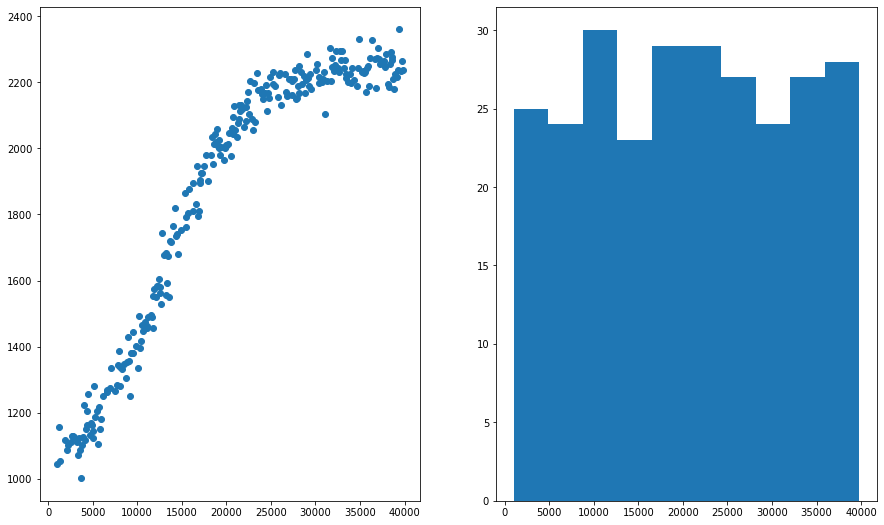

In [124]:
%matplotlib inline
fig = plt.figure(figsize = (15, 20))
gs = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gs[0,0])

ax.scatter(X,y)

ax1 = fig.add_subplot(gs[0,1])
ax1.hist(X, bins = 10)

In [136]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)


In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [138]:
y_pred = regressor.predict(X)

In [139]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
r2

0.8695512003605339

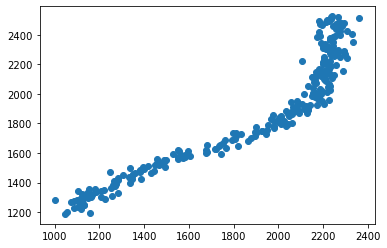

In [140]:
plt.scatter(y,y_pred)

In [141]:
test = pd.read_csv("linreg_test.csv", header=None)
test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,area,13870.000000,31127.500000,34247.500000,20110.000000,24985.000000,6850.000000,16112.500000,26447.500000,14747.50000,...,37757.500000,14845.000000,3145.000000,25570.000000,35125.000000,17380.000000,15625.000000,39317.500000,7435.000000,24400.000000
1,price,1713.565866,2279.545753,2276.370597,2158.098987,2197.525012,1197.992161,1888.245985,2206.327632,1761.51812,...,2295.320291,1717.785916,1074.296302,2138.195695,2233.802164,1909.979399,1741.810359,2134.821855,1386.677054,2165.408654


In [142]:
test = test.transpose()
test.head(5)

,0,1
0,area,price
1,13870,1713.57
2,31127.5,2279.55
3,34247.5,2276.37
4,20110,2158.1


In [145]:
X_test = test.iloc[1:,0]
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)

In [146]:
y_test = test.iloc[1:,1]
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [147]:
y_test_pred = regressor.predict(X_test)

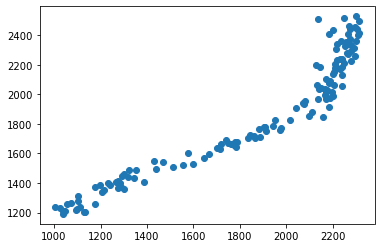

In [149]:
plt.scatter(y_test,y_test_pred)

In [150]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures()

In [156]:
regressor.fit(X_poly, y)

LinearRegression()

In [157]:
y_pred = regressor.predict(X_poly)

In [158]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
r2

0.9730328340271359